In [1]:
import numpy as np

## Amostras aleatórias

In [2]:
# matriz a partir de uma sequência
A = np.arange(15).reshape(3, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
# dimensão
A.shape  

(3, 5)

In [4]:
# número de linhas 
A.shape[0]

3

In [5]:
# número de colunas
A.shape[1]

5

In [6]:
# número de elementos
A.size

15

### Matriz de dados $\boldsymbol{X}_{n \times p}$

Seja $\boldsymbol{X}_{4 \times 3} =
        \left[
        \begin{array}{rrr}
        7 & 3 & 9\\
        4 & 6 & 11 \\
        4 & 2 & 5 \\
        5 & 5 & 7\\
        \end{array}
        \right].$

In [7]:
# montar a matriz
X = np.array([[7, 3, 9], [4, 6, 11], [4, 2, 5], [5, 5, 7]])
print(X)

[[ 7  3  9]
 [ 4  6 11]
 [ 4  2  5]
 [ 5  5  7]]


In [8]:
# obter n
n = X.shape[0]
n

4

In [9]:
# obter p
p = X.shape[1]
p

3

Obter os vetores $\boldsymbol{X}_{1\cdot}$ $\boldsymbol{X}_{2\cdot}$, $\cdots$

In [10]:
X1p = X[0,:].reshape(3, 1)
X2p = X[1,:].reshape(3, 1)
X3p = X[2,:].reshape(3, 1)
X4p = X[3,:].reshape(3, 1)

Obter o vetor de médias: $\boldsymbol{\bar{X}}_{p \times 1}$

In [11]:
Xb = np.mean(X, axis=0).reshape(3, 1)
print(Xb)

[[ 5.]
 [ 4.]
 [ 8.]]


Matricialmente, o vetor de médias amostrais é otido por:

$\boldsymbol{\bar{X}}$ = $\dfrac{1}{n} (\boldsymbol{X}_{1\cdot} + \boldsymbol{X}_{2\cdot} + \dots + \boldsymbol{X}_{n\cdot})$

In [12]:
# matricialmente
(1 / n * (X1p + X2p + X3p + X4p)).reshape(3, 1)

array([[ 5.],
       [ 4.],
       [ 8.]])

Matriz de covariâncias amostrais: $\boldsymbol{S}_{p \times p}$

In [13]:
S = np.cov(X.T)
print(S)

[[ 2.         -0.66666667  0.66666667]
 [-0.66666667  3.33333333  3.33333333]
 [ 0.66666667  3.33333333  6.66666667]]


Matricialmente, a matriz de covariâncias é otida por:

$\boldsymbol{S} = \dfrac{1}{n-1} \displaystyle \sum_{i=1}^{n}(\boldsymbol{X}_{i\cdot} - \boldsymbol{\bar{X}})(\boldsymbol{X}_{i\cdot} - \boldsymbol{\bar{X}})^T$

In [14]:
# matricialmente
(1 / (n - 1)) * (((X1p - Xb) @ (X1p - Xb).T) + 
                 ((X2p - Xb) @ (X2p - Xb).T) + 
                 ((X3p - Xb) @ (X3p - Xb).T) + 
                 ((X4p - Xb) @ (X4p - Xb).T)) 

array([[ 2.        , -0.66666667,  0.66666667],
       [-0.66666667,  3.33333333,  3.33333333],
       [ 0.66666667,  3.33333333,  6.66666667]])

Matriz de somas de quadrados e produtos: $\boldsymbol{W}_{p \times p}$

In [15]:
W = (n - 1) * S
print(W)

[[  6.  -2.   2.]
 [ -2.  10.  10.]
 [  2.  10.  20.]]


Matriz de correlações amostrais:  $\boldsymbol{R}_{p \times p}$

In [16]:
R = np.corrcoef(X.T)
R

array([[ 1.        , -0.25819889,  0.18257419],
       [-0.25819889,  1.        ,  0.70710678],
       [ 0.18257419,  0.70710678,  1.        ]])

Matricialmente, definindo $\boldsymbol{D}$ = $diag(\boldsymbol{S})$ = $diag(S_{ii})$ e $\boldsymbol{D}^{-1/2} = diag(1/\sqrt{S_{ii}})$,

$\boldsymbol{R} = \boldsymbol{D}^{-1/2}\boldsymbol{S}\boldsymbol{D}^{-1/2}$

In [17]:
# D**{-1/2}
D12 = np.diag(1 / np.sqrt(np.diag(S)))
print(D12)

[[ 0.70710678  0.          0.        ]
 [ 0.          0.54772256  0.        ]
 [ 0.          0.          0.38729833]]


In [18]:
R = D12 @ S @ D12
print(R)

[[ 1.         -0.25819889  0.18257419]
 [-0.25819889  1.          0.70710678]
 [ 0.18257419  0.70710678  1.        ]]


#### Diagramas de dispersão

In [19]:
X[:,0]

array([7, 4, 4, 5])

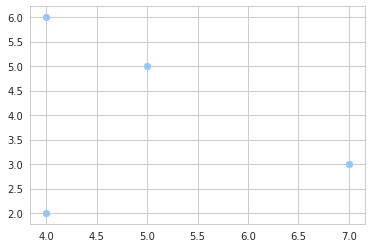

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel') 

plt.scatter(X[:,0],X[:,1]);

### Ler um csv (dataframe)

In [21]:
import pandas as pd

In [22]:
# o arquivo '.csv' deve estar na mesma pasta em que este notebook esteja salvo
# se não estiver, o caminho deve ser colocado
medidas = pd.read_csv('medidas.csv')

In [23]:
medidas.head()

,torax,cintura,quadril,sexo
0,34,30,32,M
1,37,32,37,M
2,38,30,36,M
3,36,33,39,M
4,38,29,33,M


In [24]:
medidas.mean()

torax      37.00
cintura    28.00
quadril    37.05
dtype: float64

In [25]:
medidas.cov()

,torax,cintura,quadril
torax,6.631579,6.368421,3.000000
cintura,6.368421,12.526316,3.578947
quadril,3.000000,3.578947,5.944737


In [26]:
medidas.corr()

,torax,cintura,quadril
torax,1.000000,0.698734,0.477800
cintura,0.698734,1.000000,0.414741
quadril,0.477800,0.414741,1.000000


### Transformando em matriz

In [27]:
# subselecionar variáveis e transformar em matriz
X = medidas.values[:, 0:3]
# mudar o tipo dos dados
X = np.asarray(X, dtype=float)

In [28]:
n = X.shape[0]

In [29]:
p = X.shape[1]

In [30]:
# vetor de médias
Xb = np.mean(X, axis=0)
print(Xb)

[ 37.    28.    37.05]


In [31]:
# matriz de covariâncias
S = np.cov(X.T)
print(S)

[[  6.63157895   6.36842105   3.        ]
 [  6.36842105  12.52631579   3.57894737]
 [  3.           3.57894737   5.94473684]]


In [32]:
# matriz de somas de quadrados e produtos
W = (n - 1) * S
print(W)

[[ 126.    121.     57.  ]
 [ 121.    238.     68.  ]
 [  57.     68.    112.95]]


In [33]:
# matriz de correlações
R = np.corrcoef(X.T)
R

array([[ 1.        ,  0.69873359,  0.47780035],
       [ 0.69873359,  1.        ,  0.41474133],
       [ 0.47780035,  0.41474133,  1.        ]])

In [39]:
# variância total: tr(S)
np.trace(S)

25.102631578947367

In [40]:
# ou
np.diag(S).sum()

25.102631578947367

In [41]:
# variância generalizada: |S|
np.linalg.det(S)

191.79904505029873